<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Access ACTRIS In-Situ data

In [1]:
# import packages
import pandas as pd
import numpy as np 
import requests
import json

import matplotlib.pyplot as plt

## Get metadata for instrument and country

After searching in the Metadata REST API, one chooses the metadata from certain parameters. 

In this example we get metadata from all ACTRIS In-Situ Data Centre unit data. Which is provider 14 IN-SITU

In [2]:
response = requests.get("https://dev-actris-md.nilu.no/Metadata/provider/14") 
metadata_archive = response.json() 
print("The in-situ metadata archive contains {} datasets".format(len(metadata_archive)))

The in-situ metadata archive contains 388 datasets


In [3]:
metadata_archive

[{'md_metadata': {'id': 1,
   'provider': {'name': 'IN-SITU',
    'atom': 'http://localhost:5009/Providers/14'},
   'file_identifier': 'BFFK-PH6V.nc',
   'language': 'en',
   'hierarchy_level': 'dataset',
   'online_resource': {'linkage': 'http://ebas.nilu.no/'},
   'datestamp': '2023-12-07T23:00:00.0000000Z',
   'created': '2023-12-08T10:35:04.0000000Z',
   'contact': [{'first_name': 'Markus',
     'last_name': 'Fiebig',
     'organisation_name': 'Norwegian Institute for Air Research (NILU)',
     'role_code': ['custodian'],
     'country_code': 'NO',
     'delivery_point': 'Instituttveien 18',
     'address_city': 'Kjeller',
     'administrative_area': 'Viken',
     'postal_code': 2007,
     'email': 'ebas@nilu.no',
     'position_name': 'Senior Scientist'}]},
  'md_identification': {'abstract': 'Temperature at Giordan Lighthouse. These measurements are gathered as a part of the following projects ACTRIS, EMEP',
   'title': 'Temperature at Giordan Lighthouse',
   'date_type': 'creati

In [4]:
abs_list = []
for md in metadata_archive: 
    if md['md_actris_specific']['instrument_type'][0] == 'in situ particle optical parameter instrument':
        if md['md_content_information']['attribute_descriptions'][0] == 'aerosol particle light absorption coefficient': 
            abs_list.append(md)
abs_list

[{'md_metadata': {'id': 30,
   'provider': {'name': 'IN-SITU',
    'atom': 'http://localhost:5009/Providers/14'},
   'file_identifier': '3EQF-6RDS.nc',
   'language': 'en',
   'hierarchy_level': 'dataset',
   'online_resource': {'linkage': 'http://ebas.nilu.no/'},
   'datestamp': '2023-12-08T23:00:00.0000000Z',
   'created': '2023-12-09T19:45:04.0000000Z',
   'contact': [{'first_name': 'Markus',
     'last_name': 'Fiebig',
     'organisation_name': 'NILU',
     'role_code': ['custodian'],
     'country_code': 'NO',
     'delivery_point': 'Instituttveien 18',
     'address_city': 'Kjeller',
     'administrative_area': 'Viken',
     'postal_code': 2007,
     'email': 'ebas@nilu.no',
     'position_name': 'Senior Scientist'}]},
  'md_identification': {'abstract': 'Aerosol_absorption_coefficient at Leipzig-Eisenbahnstrasse. These measurements are gathered as a part of the following projects GUAN, ACTRIS, EMEP',
   'title': 'Aerosol_absorption_coefficient at Leipzig-Eisenbahnstrasse',
   'd

Each dataset in the in-situ catalogue have the option to download or stream the file itself. 

The two protocols used are: 

**HTTP** which is direct download and gives you a phycical netCDF file on your computer. 

**OPeNDAP** which is streaming of data in binary form, no download needed. 

In [5]:
# Each file have
abs_list[0]['md_distribution_information']

[{'data_format': 'NETCDF',
  'version_data_format': '4',
  'dataset_url': 'https://dev-thredds.nilu.no/thredds/fileServer/test_catalog/3E/QF/6R/3EQF-6RDS.nc',
  'protocol': 'HTTP',
  'function': 'download',
  'restriction': {'set': False},
  'transfersize': 550970.0},
 {'data_format': 'NETCDF',
  'version_data_format': '4',
  'dataset_url': 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/3E/QF/6R/3EQF-6RDS.nc',
  'protocol': 'OPeNDAP',
  'function': 'streaming',
  'restriction': {'set': False},
  'transfersize': 550970.0}]

In this example we will use the OPeNDAP protocol

In [6]:
files_list = []
for md in abs_list:
    for i in range(len(md['md_distribution_information'])):
        if md['md_distribution_information'][i]['protocol'] == 'OPeNDAP':
            url = md['md_distribution_information'][i]['dataset_url']
            files_list.append(url)
files_list

['https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/3E/QF/6R/3EQF-6RDS.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/GC/XR/N5/GCXR-N5DR.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/X5/Y2/DM/X5Y2-DM29.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/K8/WS/JT/K8WS-JTNQ.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/24/WF/FQ/24WF-FQHA.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/JZ/GA/MS/JZGA-MSJZ.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/GJ/S4/U3/GJS4-U3TN.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/75/F4/6A/75F4-6AZY.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/HJ/DP/NW/HJDP-NWTC.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/WT/SP/UX/WTSP-UXWA.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/CP/NT/S4/CPNT-S4KQ.nc',
 'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/4B/WG/PX/4BWG-PX3K.nc',
 'https://dev-thredds.nilu.n

## Accessing data through THREDDS

THREDDS catalogue: https://thredds.nilu.no/thredds/catalog.html


### Using netCDF4 and opendap protokoll

In [7]:
import netCDF4 as nc

In [8]:
opendap_url = files_list[0]
opendap_url

'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/3E/QF/6R/3EQF-6RDS.nc'

In [9]:
dataset = nc.Dataset(opendap_url)
dataset

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ HTML PUBLIC "-//IETF//DTD HTML 2.0//EN"><html><head><title>503 Service Unavailable</title></head><body><h1>Service Unavailable</h1><p>The server is temporarily unable to service yourrequest due to maintenance downtime or capacityproblems. Please try again later.</p><hr><address>Apache/2.4.29 (Ubuntu) Server at dev-thredds.nilu.no Port 443</address></body></html>


OSError: [Errno -70] NetCDF: DAP server error: b'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/3E/QF/6R/3EQF-6RDS.nc'

### Using xarray and opendap protokoll

In [ ]:
import xarray as xr

In [ ]:
ds = xr.open_dataset(opendap_url)
ds

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ HTML PUBLIC "-//IETF//DTD HTML 2.0//EN"><html><head><title>503 Service Unavailable</title></head><body><h1>Service Unavailable</h1><p>The server is temporarily unable to service yourrequest due to maintenance downtime or capacityproblems. Please try again later.</p><hr><address>Apache/2.4.29 (Ubuntu) Server at dev-thredds.nilu.no Port 443</address></body></html>


OSError: [Errno -70] NetCDF: DAP server error: b'https://dev-thredds.nilu.no/thredds/dodsC/test_catalog/3E/QF/6R/3EQF-6RDS.nc'

## Plot data with xarray/matplotlib

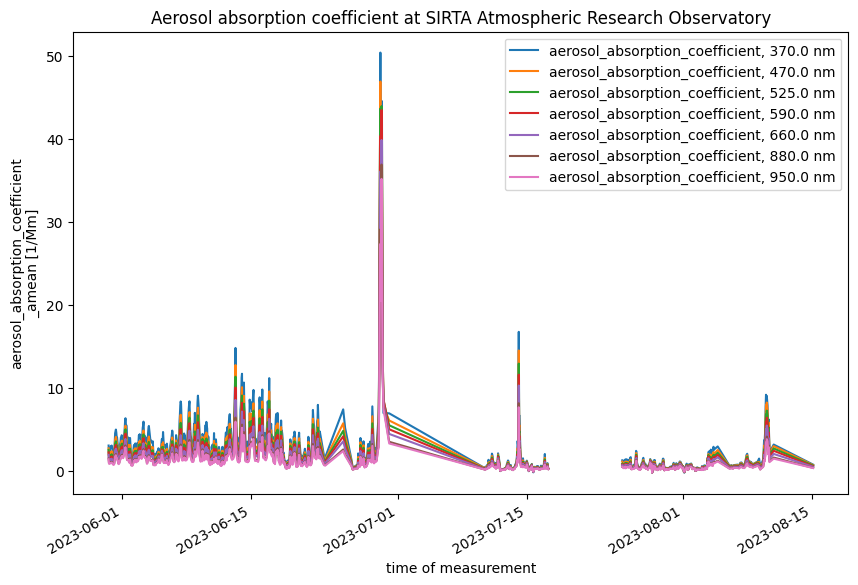

In [ ]:
# This code runs if dataset above is dataset from filter absorption photometer instruments. 

ds_filter = ds.aerosol_absorption_coefficient_amean 

fig, ax = plt.subplots(figsize=(10,6))

for i in range(len(ds_filter.Wavelength.values)): 
    ds_filter.isel(Wavelength=i).plot(ax=ax, label="aerosol_absorption_coefficient, {} nm".format(ds_filter.Wavelength.values[i]))

plt.title("{} at {}".format(ds_filter.ebas_component.replace('_',' ').capitalize(), ds.ebas_station_name))
    
plt.legend()
plt.show()